<a href="https://colab.research.google.com/github/ecostadelle/ProjetoPesquisaTratamentoIncertezas/blob/main/src/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

github = 'https://raw.githubusercontent.com/ecostadelle/ProjetoPesquisaTratamentoIncertezas/main/db/transforma.csv'

df = pd.read_csv(github, sep = ';',decimal=",")
X = df[['ira_nb1', 'ira_mr1', 'ira_nb3', 'rec_s1']]
y = y=df[['resultado_final']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

print('Tamanho de X_train: ', X_train.shape)
print('Tamanho de X_test: ', X_test.shape)
print('Tamanho de y_train: ', y_train.shape)
print('Tamanho de y_test: ', y_test.shape)

rfc = RandomForestClassifier(bootstrap=True,n_estimators=10, max_depth=None,
                             min_samples_split=2, random_state=0)
rfc.fit(X_train, y_train.values.ravel())

y_pred=rfc.predict(X_test)

print(recall_score(y_test.values.ravel(), y_pred, average=None))
print(accuracy_score(y_test.values.ravel(),y_pred))
print(confusion_matrix(y_test.values.ravel(),y_pred))

Tamanho de X_train:  (858, 4)
Tamanho de X_test:  (286, 4)
Tamanho de y_train:  (858, 1)
Tamanho de y_test:  (286, 1)
[0.96460177 0.51666667]
0.8706293706293706
[[218   8]
 [ 29  31]]


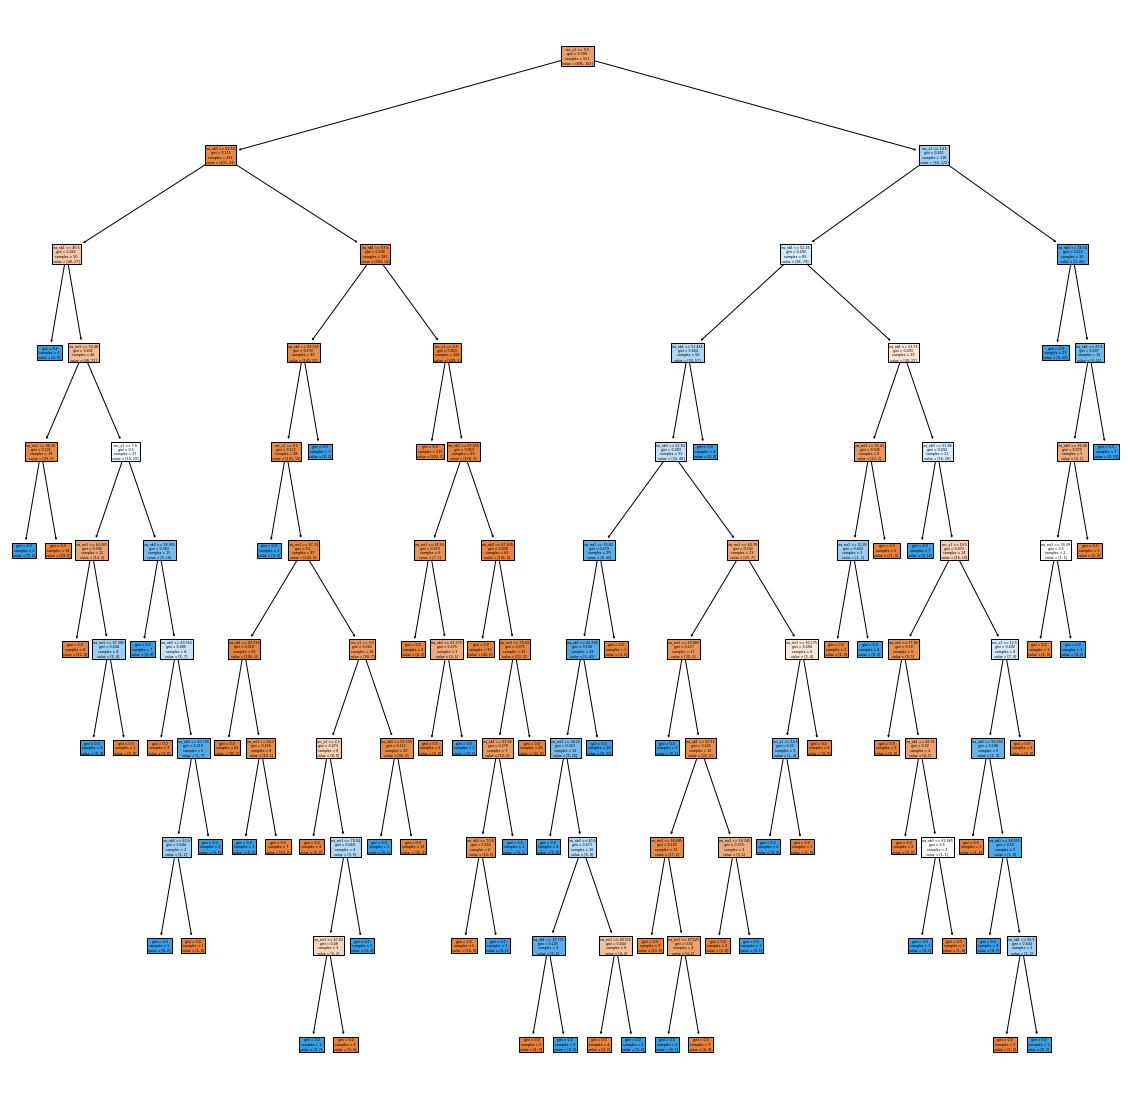

In [ ]:
#!pip install dtreeviz
from dtreeviz.trees import dtreeviz # will be used for tree visualization
from sklearn import tree
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rfc.estimators_[0], feature_names=X.columns, filled=True)

In [ ]:
pd.DataFrame(confusion_matrix(y_test.values.ravel(),y_pred))

,0,1
0,218,8
1,29,31


In [ ]:
dados = df[['resultado_final', 'ano','periodo','ira_nb1','ira_mr1','ira_nb3']]
print(dados)

     resultado_final   ano  periodo  ira_nb1  ira_mr1  ira_nb3
0           Aprovado  2013        2    66.40    71.67    71.27
1           Aprovado  2013        4    68.83    71.92    72.31
2           Aprovado  2013        3    65.42    64.25    65.19
3           Aprovado  2013        4    70.42    71.25    72.00
4           Aprovado  2013        4    65.33    69.92    70.67
...              ...   ...      ...      ...      ...      ...
1139        Aprovado  2020        1    52.50    62.50    66.08
1140       Reprovado  2020        1    46.88    48.50    49.96
1141       Reprovado  2020        1    29.19    32.19    25.38
1142       Reprovado  2020        1    33.19    39.00    42.56
1143        Aprovado  2020        1    82.94    79.44    81.54

[1144 rows x 6 columns]


In [ ]:
import seaborn as sns
x = df[['ano','periodo','ira_nb1','ira_mr1','ira_nb3']]
y=df[['resultado_final']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [ ]:
print('Tamanho de X_train: ', X_train.shape)
print('Tamanho de X_test: ', X_test.shape)
print('Tamanho de y_train: ', y_train.shape)
print('Tamanho de y_test: ', y_test.shape)

Tamanho de X_train:  (858, 4)
Tamanho de X_test:  (286, 4)
Tamanho de y_train:  (858, 1)
Tamanho de y_test:  (286, 1)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=2,
                             min_samples_split=10,
                             random_state=123)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_split=10, random_state=123)

In [ ]:
from sklearn.metrics import accuracy_score

y_train_true = y_train
y_train_pred = clf.predict(X_train)
y_test_true = y_test
y_test_pred = clf.predict(X_test)


print(f"Acurácia de Treino: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia de Teste: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia de Treino: 0.89

 ---------------------------

Acurácia de Teste: 0.89


In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 1000

import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
names=['ira_nb1', 'ira_mr1', 'ira_nb3', 'rec_s1']
plt.figure()
plot_tree(clf, filled=True,feature_names=names)
plt.show()

Antes de mais nada, você precisa instanciar o objeto do classificador e finalmente treinar seu modelo. É bem simples, veja só:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix


print(recall_score(y_test.values.ravel(), y_pred, average=None))
print(accuracy_score(y_test.values.ravel(),y_pred))
print(confusion_matrix(y_test.values.ravel(),y_pred))

[0.96460177 0.56666667]
0.8811188811188811
[[218   8]
 [ 26  34]]
